In [88]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#from kt_utils import *
#from keras.io_utils import HDF5Matrix
import h5py
from keras.callbacks import History
from PIL import Image

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

Load Dataset from h5 

In [50]:
train_dataset = h5py.File('train_happy.h5', 'r')
X_traino = np.array(train_dataset["train_set_x"][:])
Y_traino = np.array(train_dataset["train_set_y"][:])
test_dataset = h5py.File('test_happy.h5', "r")
X_testo = np.array(test_dataset["test_set_x"][:]) 
Y_testo = np.array(test_dataset["test_set_y"][:]) 

classes = np.array(test_dataset["list_classes"][:]) 

Y_traino = train_set_y_orig.reshape((1, Y_train.shape[0]))
Y_testo = test_set_y_orig.reshape((1, Y_test.shape[0]))


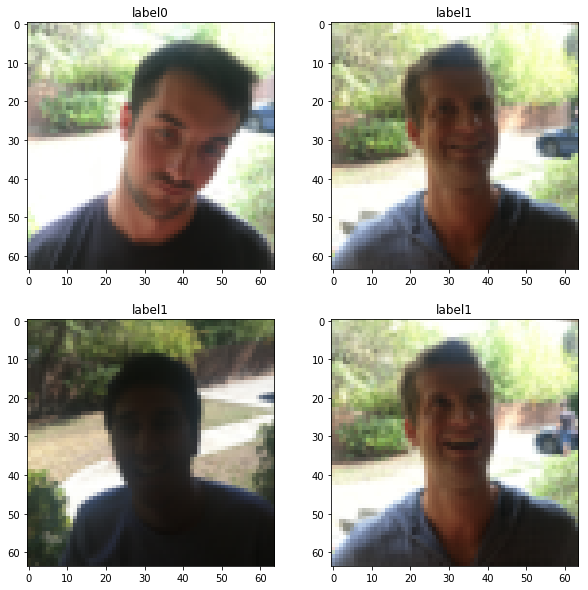

In [121]:
img = [Image.fromarray(X_traino[i], 'RGB') for i in range(4)]
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title("label" + str(Y_train[i][0]))
    plt.imshow(img[i])


preprocess the images

In [51]:
# normalize the images

X_train = X_traino/ 255.
X_test = X_testo/255.

Y_train = Y_traino.T
Y_test = Y_testo.T

print("X_train shape: %s" %(str(X_train.shape)))
print("Y_train shape: %s" %(str(Y_train.shape)))
print("X_test shape: %s" %(str(X_test.shape)))
print("Y_test shape: %s" %(str(Y_test.shape)))

X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [38]:
def hmodel(shape):
    X_input = Input(shape)
    
    X = ZeroPadding2D((3,3), name = 'pad0')(X_input)
    X = Conv2D(32, (7,7), strides = (1,1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X= Activation('relu')(X)
    X = MaxPooling2D((2,2), name = 'mp0')(X)
    X = Flatten()(X)
    
    X = Dense(1, activation = 'sigmoid', name = 'fc1')(X)    
    model = Model(inputs = X_input, outputs = X, name = 'happyface')
    
    return model
    
    

In [76]:
happy_model = hmodel(X_train.shape[1:])
happy_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
hist = happy_model.fit(x = X_train, y = Y_train, batch_size = 50, epochs = 40)

Epoch 1/40
600/600 [==============================] - 5s 8ms/step - loss: 4.0716 - acc: 0.4767
Epoch 2/40
600/600 [==============================] - 4s 7ms/step - loss: 0.9707 - acc: 0.6917
Epoch 3/40
600/600 [==============================] - 5s 8ms/step - loss: 0.4563 - acc: 0.8217
Epoch 4/40
600/600 [==============================] - 4s 7ms/step - loss: 0.2026 - acc: 0.9200
Epoch 5/40
600/600 [==============================] - 4s 7ms/step - loss: 0.1727 - acc: 0.9267
Epoch 6/40
600/600 [==============================] - 4s 7ms/step - loss: 0.1447 - acc: 0.9583
Epoch 7/40
600/600 [==============================] - 4s 7ms/step - loss: 0.1444 - acc: 0.9550
Epoch 8/40
600/600 [==============================] - 4s 7ms/step - loss: 0.1098 - acc: 0.9667
Epoch 9/40
600/600 [==============================] - 4s 7ms/step - loss: 0.1051 - acc: 0.9700
Epoch 10/40
600/600 [==============================] - 4s 7ms/step - loss: 0.1065 - acc: 0.9583
Epoch 11/40
600/600 [============================

prediction on test dataset

In [84]:
pred = happy_model.evaluate(x = X_test, y = Y_test)

150/150 [==============================] - 1s 4ms/step


In [62]:
print("Loss "+ str(pred[0]))
print("accuracy" + str(pred[1]))

Loss 0.08338927417993545
accuracy0.9666666642824808


In [63]:
happy_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
pad0 (ZeroPadding2D)         (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_3 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
mp0 (MaxPooling2D)           (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 32768)             0         
__________

sccuracy and loss graphs

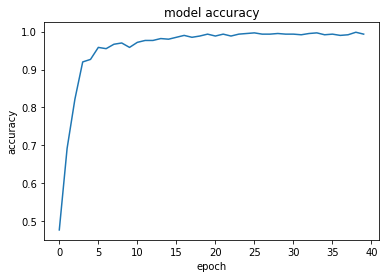

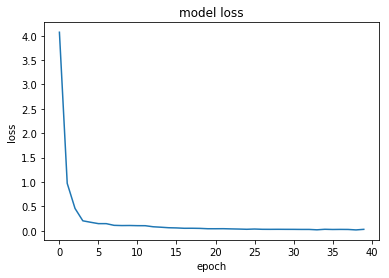

In [87]:
plt.plot(hist.history['acc'])
#plt.plot(pred.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

Test on custom dataset


In [120]:
classes

array([0, 1])

[[1.]]


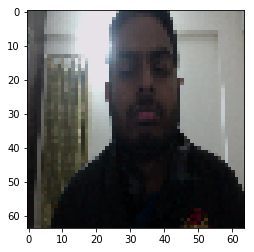

In [155]:
img = image.load_img('test/s5.jpg', target_size=(64, 64))


x = img
imshow(x)
#x = image.img_to_array(img)
#x = x/255
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(happy_model.predict(x))
